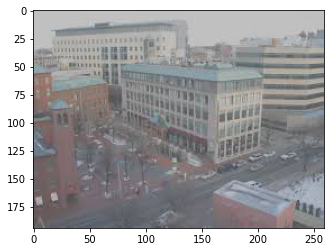

In [24]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('images.jpg')

# display the image
plt.imshow(img, cmap='gray')

(array([1.0000e+00, 3.0000e+00, 9.0000e+00, 2.3000e+01, 7.6000e+01,
        1.4600e+02, 3.2000e+02, 5.7100e+02, 1.0420e+03, 1.7670e+03,
        2.8130e+03, 3.9200e+03, 4.7510e+03, 6.0150e+03, 7.1810e+03,
        7.8570e+03, 5.1070e+03, 7.5000e+03, 6.7370e+03, 6.2270e+03,
        5.3740e+03, 4.9100e+03, 4.6820e+03, 4.1210e+03, 3.8940e+03,
        3.9310e+03, 3.9280e+03, 3.7210e+03, 3.5400e+03, 3.3800e+03,
        3.1990e+03, 3.0350e+03, 2.9880e+03, 2.0090e+03, 3.0460e+03,
        3.1970e+03, 3.1270e+03, 3.0260e+03, 2.6880e+03, 2.0890e+03,
        1.4280e+03, 1.1360e+03, 1.6100e+03, 1.3231e+04, 1.0250e+03,
        2.3500e+02, 7.9000e+01, 3.4000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 64.  ,  66.94,  69.88,  72.82,  75.76,  78.7 ,  81.64,  84.58,
         87.52,  90.46,  93.4 ,  96.34,  99.28, 102.22, 105.16, 108.1 ,
        111.04, 113.98, 116.92, 119.86, 122.8 , 125.74, 128.68, 131.62,
        134.56, 137.5 , 140.44, 143.38, 146.32, 149.26, 152.2 , 155.14,
        158.08, 161.02, 163.96

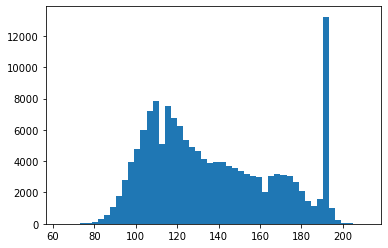

In [25]:
# convert our image into a numpy array
img = np.asarray(img)
#print(img.shape)
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

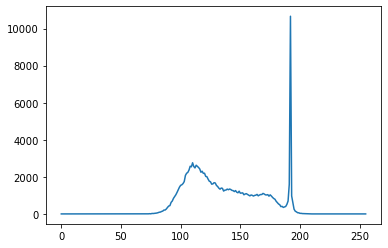

In [26]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)
plt.plot(hist)

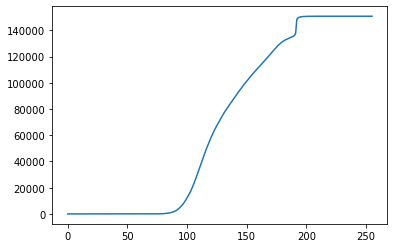

In [27]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

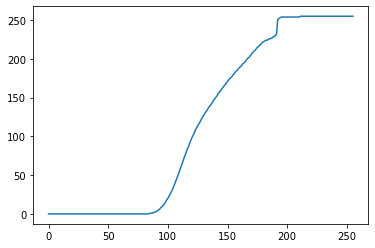

In [28]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

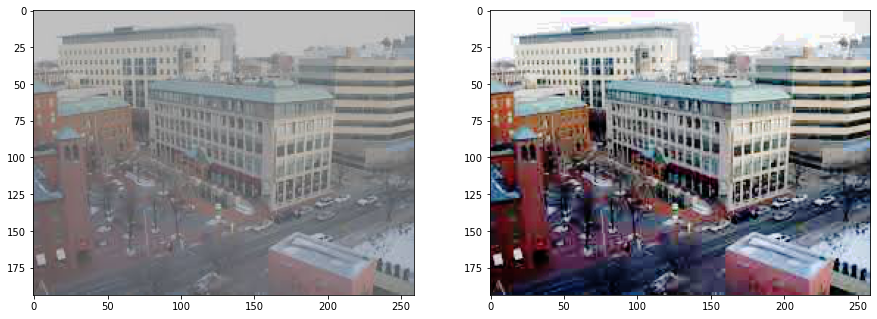

In [29]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]
#print(img_new)
#print(cs.shape)

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# display the real image
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show()